# NEOExchange Observations Planner
**Developer:** Aayushi Verma

**Aim**: this code outputs an object visibility chart, similar to StarAlt (http://catserver.ing.iac.es/staralt/).

This code is optimised for NEOExchange objects (https://neoexchange.lco.global/), however can be used for any astronomical object at any observatory.

In [1]:
#importing useful packages
import numpy as np
import matplotlib.pyplot as plt
#---
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import get_sun, SkyCoord, EarthLocation, AltAz
#---
from astroplan import Observer, FixedTarget, AltitudeConstraint, AirmassConstraint, AtNightConstraint, is_observable, is_always_observable, months_observable
#---
import pytz
import os

## 1. Input your observation session parameters here.

First, enter observation time parameters.

In [2]:
# specify the timezone
utc_offset = +13 * u.hour  # New Zealand Daylight Savings Time

# define observation dates to show on object visibility plot
obs_dates_display = '22/1 - 23/1'
obs_dates_save = '22-23Jan'

# defining the time range of the observation period
obs_start_time = Time('2021-01-22 22:00:00') - utc_offset
obs_end_time = Time('2021-01-23 06:00:00') - utc_offset
midnight = Time('2021-01-23 00:00:00') - utc_offset

Next, input your list of targets. 
1. Enter the display name of the object: 'my obj_name'
2. Enter the RA/DEC of the object, seperated by spaces: 'HH MM SS.SS +/-DD MM SS.SS'

For NEOExchange objects, the RA/Dec in this specific formatting can simply be copy/pasted from the object's ephemeris when generated on the website (https://neoexchange.lco.global/).

In [3]:
#for 22-01-21
my_targets = [['C2021_A2','09 05 29.92 -38 19 50.6'],
['P2020_V3','05 15 43.25 -01 05 58.4'],
['C2021_A7','06 11 37.87 -65 15 37.9'],
['C2021_A6','10 41 50.98 -08 39 21.1'],
['C03YY65','05 36 33.89	-33 06 27.1'],
['P11aIZR','05 49 19.13	-13 58 57.0'],
['P11aNeJ','06 15 52.70	-00 35 52.2'],
['189040','12 50 41.23 -11 52 30.4'],
['360502','05 12 38.22 -46 34 37.5']]

# my_targets = [['C/2021 A2','09 05 29.92 -38 19 50.6']]

Here, define the observation location parameters. Edit the latitude, longitude and elevation for your observatory.

In [4]:
# defining the observing location parameters
latitude = -43.29 * u.deg
longitude = 170.27 * u.deg
elevation = 1029 * u.m

In [5]:
# defining the limiting altitude of the telescope, i.e. the minimum altitude possible.
lim_alt = 30 #degrees

## 2. The following code will provide useful information for your observation session.

Run the code, no need to change anything.

In [6]:
# Specify the location of your observatory:
obs_location = EarthLocation.from_geodetic(longitude, latitude, elevation)

# Make an observer at your observatory:
observatory = Observer(location=obs_location)

# making time range of osbervation period
obs_time_range = Time([obs_start_time, obs_end_time])

In [7]:
# making a list of Fixed Targets and SkyCoords for later calculation purposes
targets_lst = []
skycoord_targets_lst = []

for my_target in my_targets:
    fixed_target = FixedTarget(coord=SkyCoord(my_target[1], unit=(u.hourangle, u.deg)), name=my_target[0])
    targets_lst.append(fixed_target)
    skycoord_target = SkyCoord(my_target[1], unit=(u.hourangle, u.deg))
    skycoord_targets_lst.append(skycoord_target)

In [8]:
# defining midnight for calculation purposes
delta_midnight = np.linspace(-2, 7, 100)*u.hour

# calculations of altitude/azimuths of object
target_altaz =[]
target_altazs=[]

for a_target in skycoord_targets_lst:
    target_altaz.append(a_target.transform_to(AltAz(obstime=obs_start_time,location=obs_location)))
    target_altazs.append(a_target.transform_to(AltAz(obstime=midnight+delta_midnight, location=obs_location)))

# calculations for plotting purposes
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times = midnight + delta_midnight
altazframe = AltAz(obstime=times, location=obs_location)
sunaltazs = get_sun(times).transform_to(altazframe)

target_altazs = []
for target in skycoord_targets_lst:
    target_altazs.append(target.transform_to(altazframe))

## 3. Object Visibility Plot!

Run the code to obtain your object visibility plot.

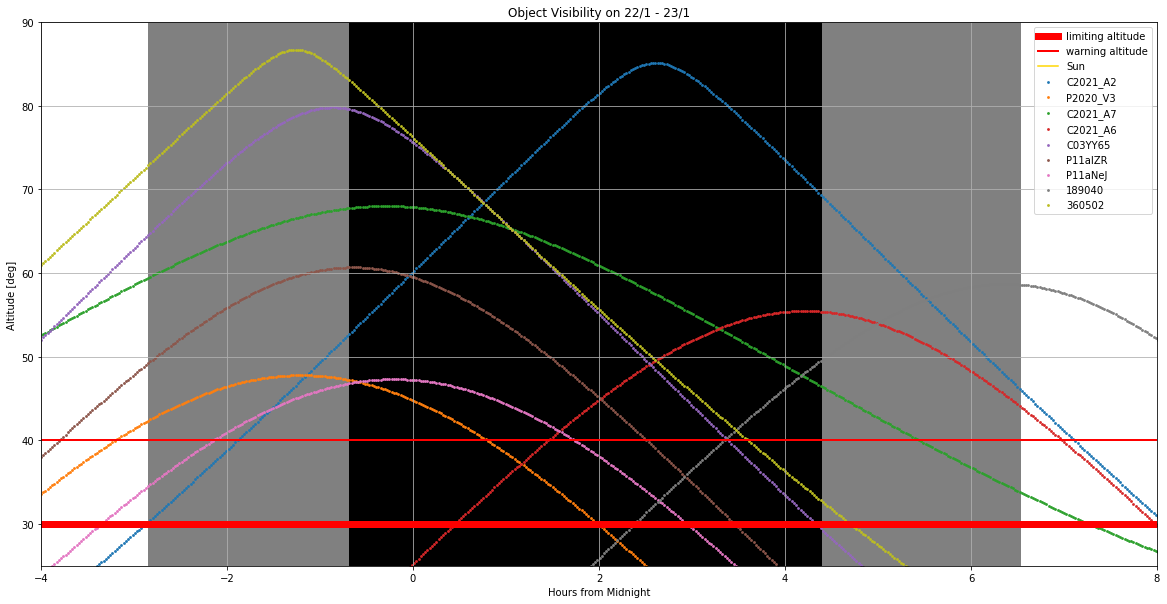

In [9]:
# making a zero-line for the limiting alitude of your telescope
zeroLine_x1=np.arange(-12,90,10)
zeroLine_y1=np.full(len(zeroLine_x1),lim_alt)

# making a warning zero-line for the limiting alitude of your telescope
zeroLine_y2=np.full(len(zeroLine_x1),lim_alt+10)

# plotting
plt.figure(figsize=(20,10))
plt.plot(zeroLine_x1,zeroLine_y1,"-",linewidth=7,color="red",label="limiting altitude")
plt.plot(zeroLine_x1,zeroLine_y2,"-",linewidth=2,color="red",label="warning altitude")

# plotting the alitudes of the objects
plt.plot(delta_midnight, sunaltazs.alt, color='gold', label='Sun') 
for i in range(len(target_altazs)):  
    plt.scatter(delta_midnight,target_altazs[i].alt,label='{}'.format(my_targets[i][0]), lw=0, s=8) 

# defining twilight/nighttimes
plt.fill_between(delta_midnight, 0, 90, sunaltazs.alt < -0*u.deg, color='0.5', zorder=0)  
plt.fill_between(delta_midnight, 0, 90, sunaltazs.alt < -18*u.deg, color='k', zorder=0)   

plt.legend()
plt.xlim(-4, 8)          #can change this as appropriate
plt.ylim(lim_alt-5, 90)  #could range from 0-90 degrees
plt.xlabel('Hours from Midnight')  
plt.ylabel('Altitude [deg]')  
plt.title("Object Visibility on {}".format(obs_dates_display))
plt.grid()
plt.show()

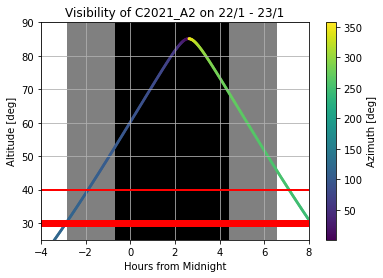

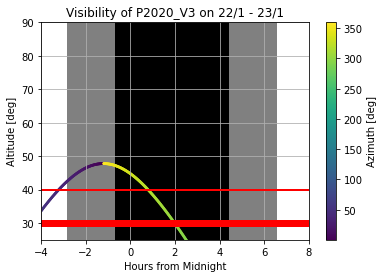

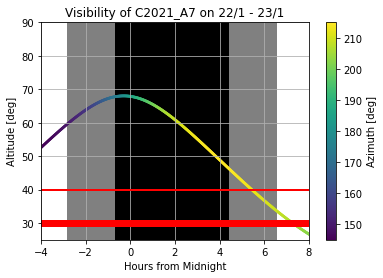

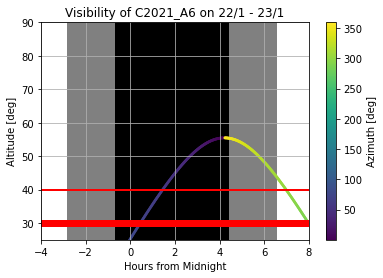

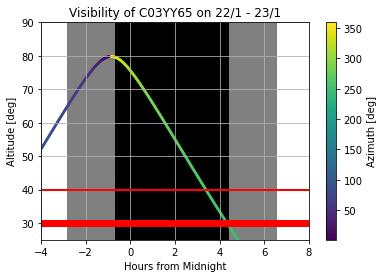

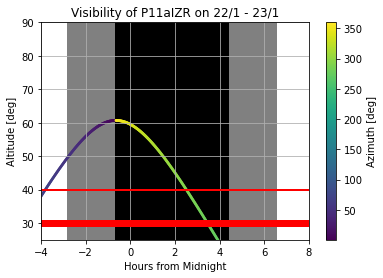

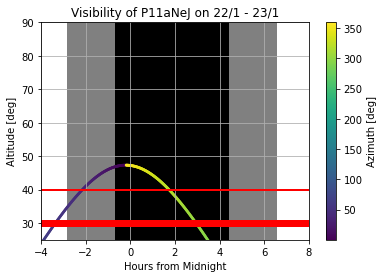

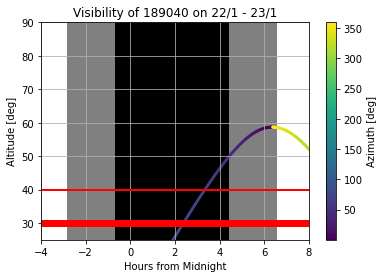

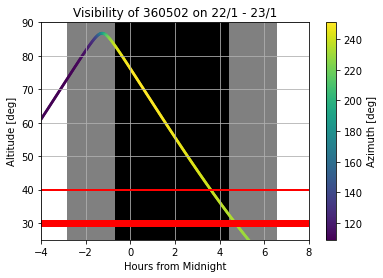

In [10]:
# making a zero-line for the limiting alitude of your telescope
zeroLine_x1=np.arange(-12,90,10)
zeroLine_y1=np.full(len(zeroLine_x1),lim_alt)

# making a warning zero-line for the limiting alitude of your telescope
zeroLine_y2=np.full(len(zeroLine_x1),lim_alt+10)

for i in range(len(target_altazs)):
    os.chdir("C://Users//ave41//OneDrive - University of Canterbury//ASTR391 Research Project//Code//Obs Planning Code//NEOExchange-Observations-Planner")
    # plotting
    plt.figure() #figsize=(20,10)
    plt.plot(zeroLine_x1,zeroLine_y1,"-",linewidth=7,color="red")
    plt.plot(zeroLine_x1,zeroLine_y2,"-",linewidth=2,color="red")

    # plotting the alitudes of the objects
    #plt.plot(delta_midnight, sunaltazs.alt, color='gold', label='Sun') 
    plt.scatter(delta_midnight,target_altazs[i].alt,c=target_altazs[i].az, lw=0, s=8) 
    plt.colorbar().set_label('Azimuth [deg]') 
    
    # defining twilight/nighttimes
    plt.fill_between(delta_midnight, 0, 90, sunaltazs.alt < -0*u.deg, color='0.5', zorder=0)  
    plt.fill_between(delta_midnight, 0, 90, sunaltazs.alt < -18*u.deg, color='k', zorder=0)   

    #plt.legend()
    plt.xlim(-4, 8)          #can change this as appropriate
    plt.ylim(lim_alt-5, 90)  #could range from 0-90 degrees
    plt.xlabel('Hours from Midnight')  
    plt.ylabel('Altitude [deg]')  
    plt.title("Visibility of {} on {}".format(my_targets[i][0],obs_dates_display))
    plt.grid()
    os.chdir("Plots/")
    plt.savefig('{}.png'.format(my_targets[i][0]+'-'+obs_dates_save))
    plt.show()